### Importações

In [1]:
import pandas as pd
import numpy as np
import sys
import os

In [2]:
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
from Functions.FNC_Pro import lista_produtos, configurar_credenciais_bq, Base_venda

### Base de vendas

In [3]:
produtos = lista_produtos('G:/Drives compartilhados/Planilha de Impostos/BI/Planilha com Impostos.xlsm')
produtos.head()

,ID_Sku
0,74001
1,61580
2,10530
3,18615
4,67857


In [3]:
configurar_credenciais_bq(r'G:Drives compartilhados/Bases BI/epoca-230913-b478a9a0dd4c.json')

Venda = Base_venda('7172')

c:\Users\joao.pcarvalho\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [4]:
Venda.tail()

,SKU,Preco_Listado,Preco,Demanda,Log_Preco,Log_Demanda,Log_Demanda_7D,Ano_Mes,Black_Friday,Domingo,Quarta-feira,Quinta-feira,Segunda-feira,Sexta-feira,Sábado,Terça-feira,Log_Preco_7D,promocionado_25,promocionado_50
Data,,,,,,,,,,,,,,,,,,,
2025-09-24,7172,369.24,369.24,21.0,5.911447,3.044522,2.628801,2025-09,0,0,1,0,0,0,0,0,5.903558,0,0
2025-09-25,7172,365.74,365.74,17.0,5.901923,2.833213,2.790288,2025-09,0,0,0,1,0,0,0,0,5.898374,0,0
2025-09-26,7172,358.78,358.78,13.0,5.882709,2.564949,2.841582,2025-09,0,0,0,0,0,1,0,0,5.892161,0,0
2025-09-27,7172,360.80,360.80,18.0,5.888324,2.890372,2.929287,2025-09,0,0,0,0,0,0,1,0,5.888177,0,0
2025-09-28,7172,369.00,369.00,1.0,5.910797,2.781478,2.781478,2025-09,0,1,0,0,0,0,0,0,5.888165,0,0


### Avaliação estatística

=== AVALIAÇÃO ESTATÍSTICA PARA SKU 7172 ===

1. ESTATÍSTICAS DESCRITIVAS:
           Preco    Demanda  Log_Preco  Log_Demanda  Log_Preco_7D  \
count  1097.0000  1097.0000  1097.0000    1097.0000     1097.0000   
mean    298.1967    58.9544     5.6919       3.6955        5.6917   
std      32.3816   128.9913     0.1082       0.8102        0.1010   
min     185.3600     0.0000     5.2223      -4.6052        5.3645   
25%     275.8400    24.0000     5.6198       3.1781        5.6227   
50%     293.6800    41.0000     5.6825       3.7136        5.6804   
75%     319.0000    68.0000     5.7652       4.2195        5.7601   
max     381.0100  3191.0000     5.9428       8.0681        5.9173   

       Log_Demanda_7D  
count       1097.0000  
mean           3.7943  
std            0.6825  
min            2.0053  
25%            3.3011  
50%            3.8067  
75%            4.2382  
max            6.9123  


2. VALORES MISSING:
SKU                0
Preco_Listado      0
Preco              0
Dem

c:\Users\joao.pcarvalho\Desktop\Git Repositórios\Forecast-vendas-e-elasticidade\Functions\FNC_aval_estat.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_prices.index, y=top_prices.values, palette='viridis', order=top_prices.index)


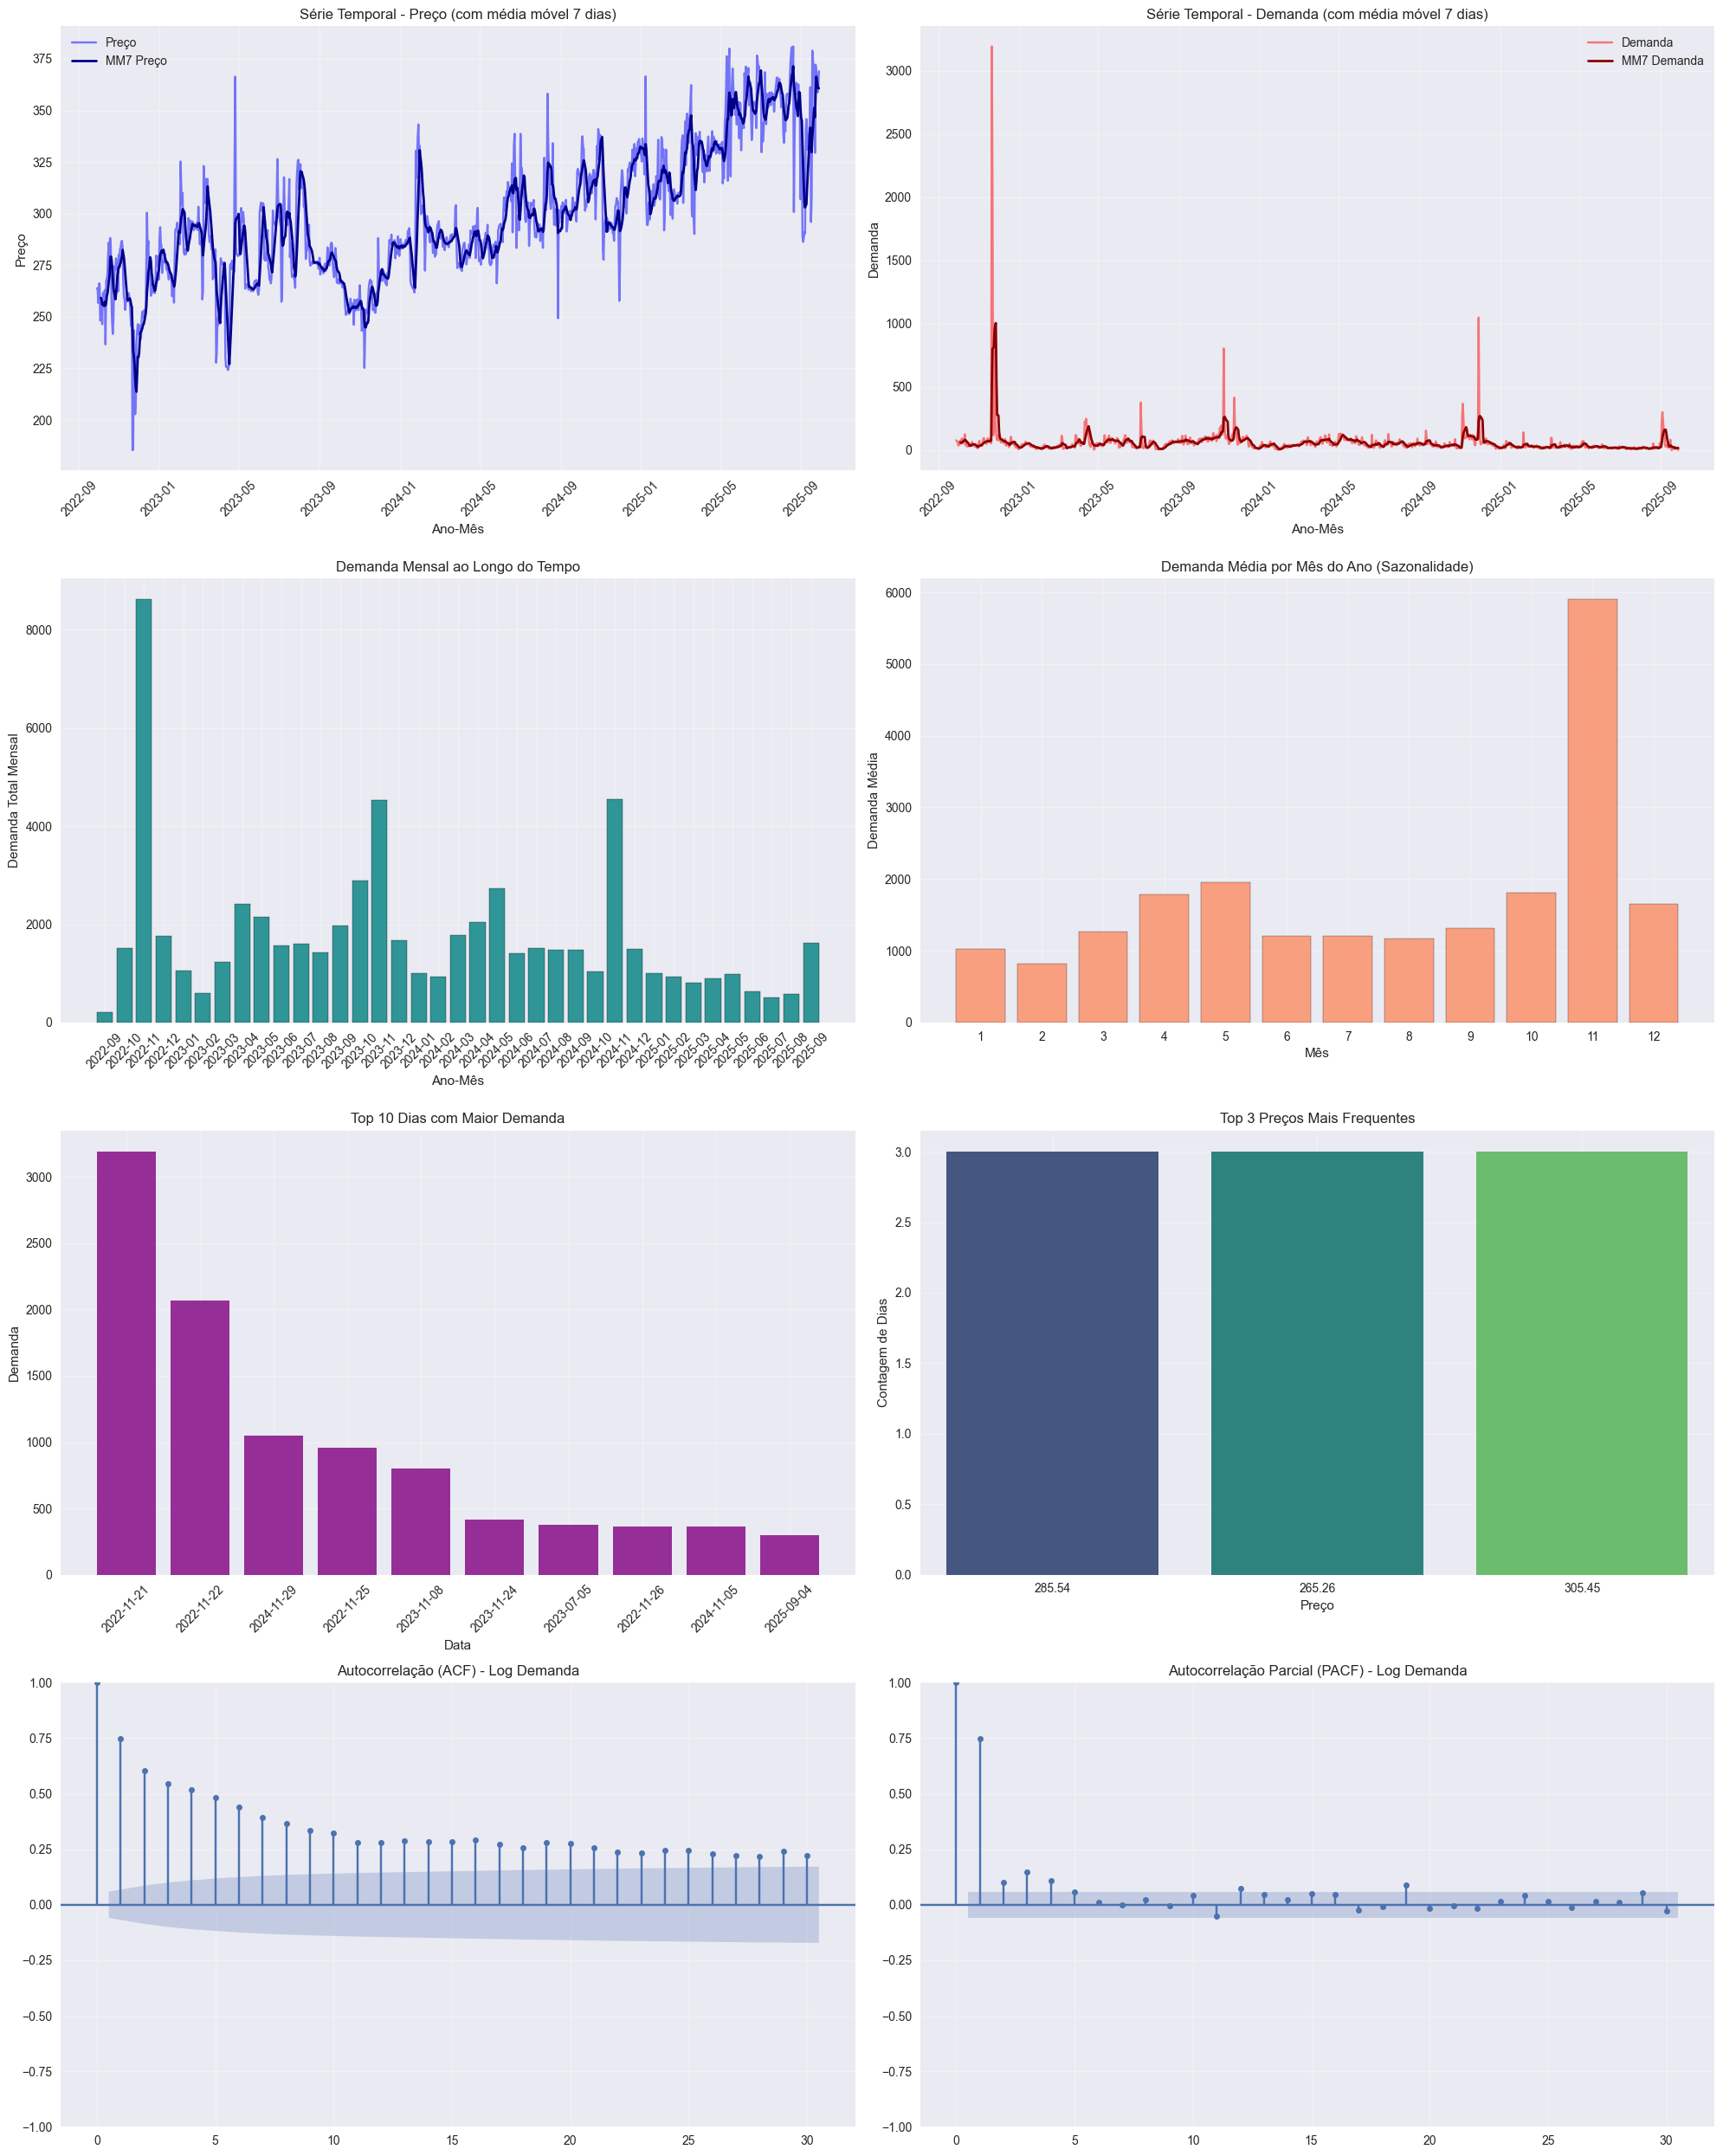

7. ANÁLISE DE SAZONALIDADE POR DIA DA SEMANA:
Demanda média por dia da semana:
  Segunda-feira: 70.81
  Terça-feira: 68.63
  Quarta-feira: 62.57
  Quinta-feira: 56.40
  Sexta-feira: 62.26
  Sábado: 46.12
  Domingo: 46.02

8. RESUMO E RECOMENDAÇÕES PARA MODELAGEM:
TODAS as variáveis são estacionárias - OK para modelagem

 Correlação Log_Preco x Log_Demanda: -0.6951
   → Correlação forte - bom preditor

 RECOMENDAÇÕES FINAIS PARA VALIDAÇÃO CRUZADA:
1. Variáveis já estacionárias - pode prosseguir diretamente
4. Use TimeSeriesSplit do sklearn para validação cruzada temporal
5. Monitore overfitting comparando performance treino/teste
6. Considere modelos SARIMA para capturar sazonalidade

 Análise concluída - Dados prontos para modelagem!


(     AnoMes       Preco  Demanda  Log_Preco  Log_Demanda
 0   2022-09  261.406667    212.0   5.565995     4.253503
 1   2022-10  265.185161   1517.0   5.579159     3.775728
 2   2022-11  250.664000   8615.0   5.518190     4.650235
 3   2022-12  263.371613   1767.0   5.572131     3.920139
 4   2023-01  277.904194   1061.0   5.626527     3.411263
 5   2023-02  293.394643    591.0   5.680941     2.949246
 6   2023-03  283.633548   1231.0   5.644110     3.463641
 7   2023-04  267.951667   2422.0   5.584715     4.070361
 8   2023-05  272.689677   2154.0   5.607218     4.179816
 9   2023-06  289.950000   1572.0   5.668227     3.767679
 10  2023-07  291.666129   1599.0   5.673398     3.480653
 11  2023-08  289.581290   1422.0   5.666727     3.592199
 12  2023-09  275.104667   1975.0   5.616945     4.147224
 13  2023-10  257.608065   2889.0   5.551188     4.519359
 14  2023-11  257.092333   4539.0   5.548513     4.801911
 15  2023-12  277.811613   1675.0   5.626540     3.706341
 16  2024-01  

In [5]:
from Functions.FNC_aval_estat import avaliar_dados_series_temporais

avaliar_dados_series_temporais(Venda,'7172')

### Modelo: Validação Cruzada de Séries Temporais

In [6]:
from Functions.FNC_TSCV import modelo_validacao_cruzada_series_temporais, converter_para_escala_original,encontrar_melhor_alpha


resultados_modelo_principal = modelo_validacao_cruzada_series_temporais(
    Venda, '7172', 
    'Log_Preco',                                                                   #Variáveis independentes
    'Quarta-feira', 'Terça-feira'
    ,var_dpd = 'Log_Demanda'                                                       #Variáveis dependentes
    ,n_splits=10
)

# Converter para a escala original
metricas_originais = converter_para_escala_original(resultados_modelo_principal, Venda)

# Encontre o melhor alpha, mas armazene em variáveis diferentes para não sobrescrever
X_cols = ['Log_Preco','Black_Friday','promocionado_25', 'Quarta-feira','Terça-feira']
y_col = 'Log_Demanda'
melhor_alpha, resultados_alpha = encontrar_melhor_alpha(Venda, X_cols, y_col)

=== MODELO DE VALIDAÇÃO CRUZADA - SKU 7172 ===

Verificando qualidade dos dados...
 Executando validação cruzada temporal...
 Fold 1:
   Período teste: 2023-01-13 a 2023-04-21
   RMSE: 0.6174, WAPE: 14.49%
 Fold 2:
   Período teste: 2023-04-22 a 2023-07-29
   RMSE: 0.5602, WAPE: 11.64%
 Fold 3:
   Período teste: 2023-07-30 a 2023-11-05
   RMSE: 0.5123, WAPE: 10.80%
 Fold 4:
   Período teste: 2023-11-06 a 2024-02-12
   RMSE: 0.6263, WAPE: 13.15%
 Fold 5:
   Período teste: 2024-02-13 a 2024-05-21
   RMSE: 0.6089, WAPE: 12.83%
 Fold 6:
   Período teste: 2024-05-22 a 2024-08-28
   RMSE: 0.5605, WAPE: 13.21%
 Fold 7:
   Período teste: 2024-08-29 a 2024-12-05
   RMSE: 0.7998, WAPE: 15.79%
 Fold 8:
   Período teste: 2024-12-06 a 2025-03-14
   RMSE: 0.4525, WAPE: 10.43%
 Fold 9:
   Período teste: 2025-03-15 a 2025-06-21
   RMSE: 0.4649, WAPE: 11.45%
 Fold 10:
   Período teste: 2025-06-22 a 2025-09-28
   RMSE: 0.8758, WAPE: 13.85%

 RESULTADOS FINAIS DO MODELO
 Métricas Médias nos 10 folds:
   

### Modelo: SARIMAX 

In [7]:
from Functions.FNC_SARIMAX import modelo_sarimax

# Variáveis exógenas
exog_vars_sarimax = [
    'Log_Preco'
]

resultado_sarimax = modelo_sarimax(
    Venda, 
    '7172', 
    *exog_vars_sarimax,
    endog_var='Log_Demanda',
    order=(1, 1, 1), 
    seasonal_order=(1, 1, 1, 7)
)

--- Análise de Estacionariedade para: Demanda ---
Estatística ADF: -10.125695857943171
p-valor: 9.194507395089373e-18
Valores Críticos:
	1%: -3.4363635475753824
	5%: -2.864195245967465
	10%: -2.5681837404258903
Resultado: A série 'Demanda' é ESTACIONÁRIA (p-valor <= 0.05). Rejeita-se a hipótese nula.
--------------------------------------------------
--- Análise de Estacionariedade para: Log_Demanda ---
Estatística ADF: -3.7412655207758743
p-valor: 0.0035687692859107485
Valores Críticos:
	1%: -3.4364306491488814
	5%: -2.8642248442477976
	10%: -2.5681995044075987
Resultado: A série 'Log_Demanda' é ESTACIONÁRIA (p-valor <= 0.05). Rejeita-se a hipótese nula.
--------------------------------------------------

--- Treinando Modelo SARIMAX para SKU: 7172 ---
Variável Dependente: Log_Demanda
Variáveis Independentes: ['Log_Preco']
Ordem (p,d,q): (1, 1, 1)
Ordem Sazonal (P,D,Q,s): (1, 1, 1, 7)

--- Sumário do Modelo SARIMAX ---
                                     SARIMAX Results              

### Consolidação e Comparação de Previsões

In [8]:
from Functions.FNC_Previsoes import gerar_previsoes_e_relatorios

# Definir o caminho para a planilha de preços
caminho_previsao = 'C:/Users/joao.pcarvalho/Desktop/Git Repositórios/Forecast-vendas-e-elasticidade/Forecast/Precos_para_previsoes.xlsx'

# Definir as colunas de features usadas no modelo TSCV
X_cols_tscv = ['Log_Preco', 'Quarta-feira', 'Terça-feira']

# Gerar as previsões e o relatório de comparação
df_previsoes, df_relatorio = gerar_previsoes_e_relatorios(
    resultados_modelo_principal,
    resultado_sarimax,
    '7172',
    caminho_previsao,
    X_cols_tscv=X_cols_tscv
)


--- INICIANDO GERAÇÃO DE PREVISÕES E RELATÓRIOS ---

Calculando previsões para o modelo de Validação Cruzada (TSCV)...
Calculando previsões para o modelo SARIMAX...

Arquivo de previsões salvo em: ../Resultados/previsoes_consolidadas_7172.csv

Gerando relatório de comparação de modelos...
Arquivo de relatório de modelos salvo em: ../Resultados/relatorio_comparacao_modelos_7172.csv

--- Processo Concluído ---

Calculando previsões para o modelo de Validação Cruzada (TSCV)...
Calculando previsões para o modelo SARIMAX...

Arquivo de previsões salvo em: ../Resultados/previsoes_consolidadas_7172.csv

Gerando relatório de comparação de modelos...
Arquivo de relatório de modelos salvo em: ../Resultados/relatorio_comparacao_modelos_7172.csv

--- Processo Concluído ---


In [9]:
print("DataFrame com as Previsões Consolidadas:")
df_previsoes.head(20)

DataFrame com as Previsões Consolidadas:


,Data,SKU,Preco,previsao_SARIMAX,previsao_TSCV
0,2025-09-18,7172,379,11.652842,8.486780
1,2025-09-19,7172,375,11.347645,8.982709
2,2025-09-20,7172,370,12.550254,9.651848
3,2025-09-21,7172,369,9.669157,9.792682
4,2025-09-22,7172,329,28.045241,18.097701
5,2025-09-23,7172,372,9.018180,11.014286
6,2025-09-24,7172,369,10.709999,11.326230
7,2025-09-25,7172,366,13.307490,10.230057
8,2025-09-26,7172,358,16.365124,11.514696
9,2025-09-27,7172,360,16.006511,11.176403


In [10]:
print("DataFrame com o Relatório de Comparação dos Modelos:")
df_relatorio.head()

DataFrame com o Relatório de Comparação dos Modelos:


,sku,data_rodagem,coef_log_preco_tscv,coef_log_preco_sarimax,intercepto_tscv,AIC_sarimax,BIC_sarimax,AIC_cruzado,BIC_cruzado
0,7172,2025-09-28 11:58:41,-5.352584,-8.496162,33.919669,1085.334085,1115.242382,815.990718,832.505692


### Visualização da Performance das Previsões

--- GERANDO GRÁFICOS DE COMPARAÇÃO DE PREVISÕES PARA SKU 7172 ---


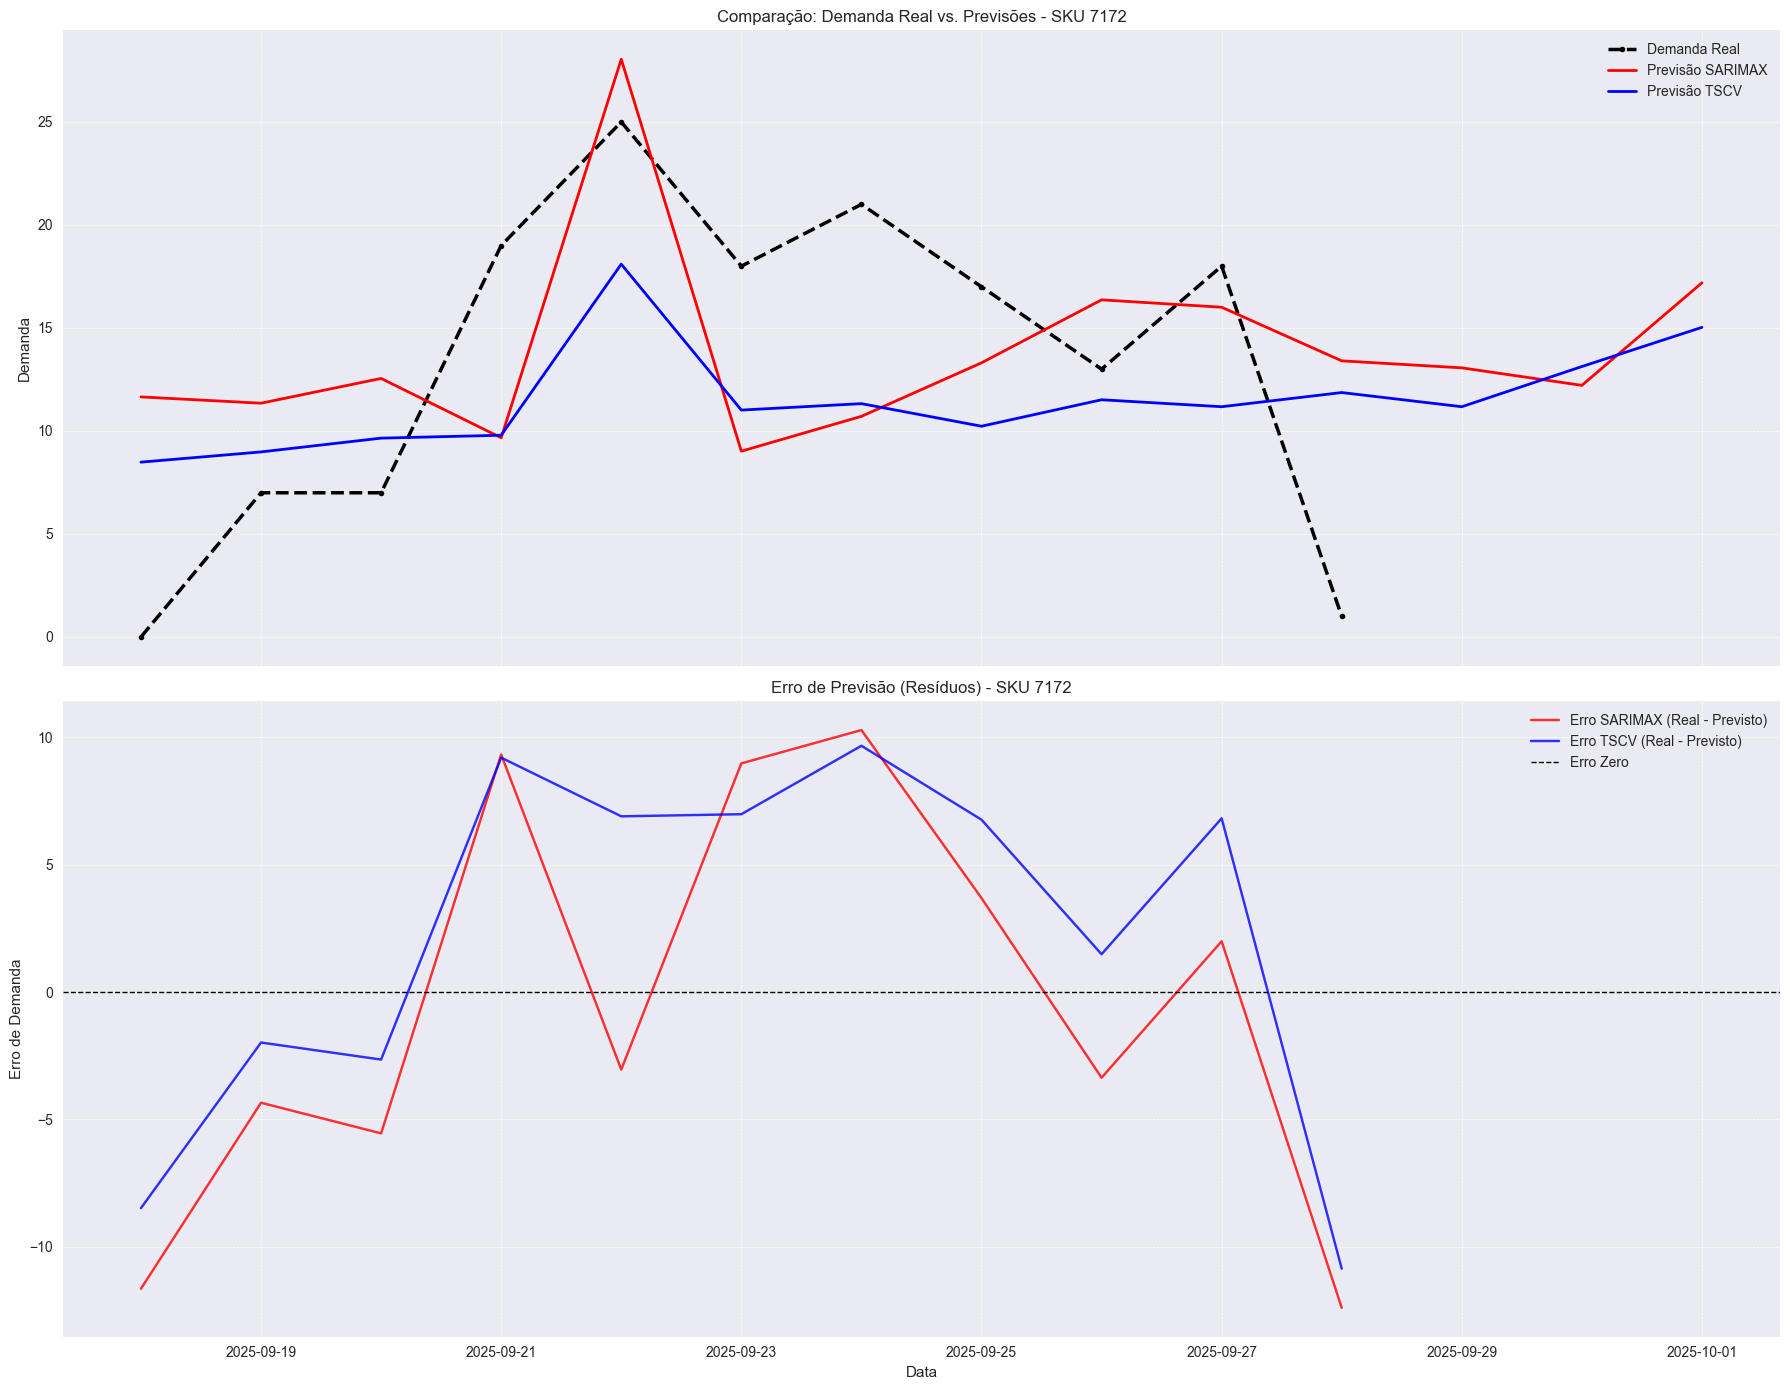

In [11]:
from Functions.FNC_aval_estat import plotar_comparacao_previsoes


plotar_comparacao_previsoes(df_previsoes, Venda, '7172')